## Scenario 1: A 2-headed coin
Create a fair coin (with faces H and T) and one unfair coin, in which one of the faces has a weight of 5 and the others 1.
Play a game of 1000 flips of three coins with all fair dice.
Play a game of 1000 flips with two unfair dice and one fair die.
For each game, use an Analyzer object to determine the relative frequency of jackpots – getting either all Hs or all Ts.
Compute relative frequency as the number of jackpots over the total number of rolls.
Show your results, comparing the two relative frequencies, in a simple bar chart.

In [1]:
#Note: instructions not clear "Play a game of 1000 flips of three coins with all fair dice." -- we were not asked to define 
#any dice yet? I took this to mean "Play a game of 1000 flips of three fair coins"

#Subsequently, I took "Play a game of 1000 flips with two unfair dice and one fair die." to mean "Play a game of 1000 flips
#with two unfair *coins* and one fair *coin*"

In [2]:
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer
import pandas as pd
import numpy as np

In [3]:
fair_coin = Die(['H', 'T'])
fair_coin.df

,Weights,Faces
0,1.0,H
1,1.0,T


In [4]:
unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

In [5]:
unfair_coin.df

,Weights,Faces
0,5.0,H
1,1.0,T


In [6]:
fair_game = Game([fair_coin, fair_coin, fair_coin])

[<montecarlo.Die object at 0x7f6614f1e1c0>, <montecarlo.Die object at 0x7f6614f1e1c0>, <montecarlo.Die object at 0x7f6614f1e1c0>]


In [7]:
fair_game.play(1000)

In [8]:
fair_game = fair_game.show()

In [9]:
type(fair_game)

pandas.core.frame.DataFrame

In [10]:
unfair_game = Game([unfair_coin, unfair_coin, fair_coin])

[<montecarlo.Die object at 0x7f6614f2da60>, <montecarlo.Die object at 0x7f6614f2da60>, <montecarlo.Die object at 0x7f6614f1e1c0>]


In [11]:
unfair_game.play(1000)

In [12]:
unfair_game = unfair_game.show()

In [13]:
unfair_game

,0,1,2
Roll Number,,,
0,H,H,T
1,H,H,T
2,H,H,H
3,H,T,H
4,H,T,H
...,...,...,...
995,H,H,H
996,H,H,T
997,H,H,H


In [14]:
ana_fair_game = Analyzer(fair_game)

In [15]:
ana_fair_game.jackpot()

You have 259 jackpots


259

In [16]:
ana_unfair_game = Analyzer(unfair_game)

In [17]:
ana_unfair_game.jackpot()

You have 357 jackpots


357

In [19]:
unfair_jckpt = float(ana_unfair_game.jackpot())

You have 357 jackpots


In [22]:
unfair_rel_freq = unfair_jckpt/1000
unfair_rel_freq

0.357

In [24]:
fair_jckpt = float(ana_fair_game.jackpot())
fair_rel_freq = fair_jckpt/1000
fair_rel_freq

You have 259 jackpots


0.259

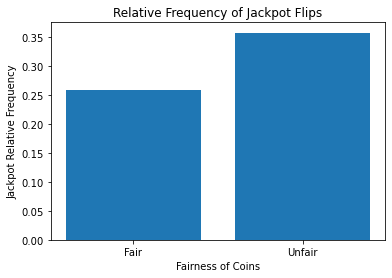

In [27]:
import matplotlib.pyplot as plt

games = ['Fair', 'Unfair']
rel_freq = [fair_rel_freq, unfair_rel_freq]

plt.bar(games,rel_freq)
plt.title('Relative Frequency of Jackpot Flips')
plt.xlabel('Fairness of Coins')
plt.ylabel('Jackpot Relative Frequency')
plt.show()

## Scenario 2: A 6-sided die
Create a fair die and two unfair dice, all of six sides with the faces 1 through 6. One unfair die (Type 1) will weight 6 five times more than the others (i.e. it has weight of 5 and the others a weight of 1 each). The other unfair die (Type 2) will  weight 1 five times more than the others.
Play a game of 10000 rolls with 5 fair dice.
Play a game of 10000 rolls with 2 unfair dice of type 1, 1 unfair die of type 2, and the rest fair dice.
For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.
Also compute 10 most frequent combinations of faces for each game. Plot each of these as bar charts.

In [30]:
fair_die = Die([1,2,3,4,5,6])
unfair_die1 = Die([1,2,3,4,5,6])
unfair_die2 = Die([1,2,3,4,5,6])

In [31]:
unfair_die1.change_weight(6,5)

In [32]:
unfair_die2.change_weight(1,5)

In [37]:
fair_diegame = Game([fair_die, fair_die, fair_die, fair_die, fair_die])
fair_diegame.play(1000)
fair_diegame = fair_diegame.show()
#fair_diegame

[<montecarlo.Die object at 0x7f660f38b0d0>, <montecarlo.Die object at 0x7f660f38b0d0>, <montecarlo.Die object at 0x7f660f38b0d0>, <montecarlo.Die object at 0x7f660f38b0d0>, <montecarlo.Die object at 0x7f660f38b0d0>]


In [40]:
unfair_diegame = Game([unfair_die1, unfair_die1, unfair_die2, fair_die, fair_die])
unfair_diegame.play(1000)
unfair_diegame = unfair_diegame.show()
#unfair_diegame

[<montecarlo.Die object at 0x7f660f38bd30>, <montecarlo.Die object at 0x7f660f38bd30>, <montecarlo.Die object at 0x7f660f38bf40>, <montecarlo.Die object at 0x7f660f38b0d0>, <montecarlo.Die object at 0x7f660f38b0d0>]


In [42]:
a_unfair = Analyzer(unfair_diegame)
a_unfair.jackpot()

You have 2 jackpots


2

In [43]:
a_fair = Analyzer(fair_diegame)
a_fair.jackpot()

You have 0 jackpots


0

In [44]:
fairgame_jckpt = float(a_fair.jackpot())
fair_rf = fairgame_jckpt/1000
fair_rf

You have 0 jackpots


0.0

In [45]:
unfairgame_jckpt = float(a_unfair.jackpot())
unfair_rf = unfairgame_jckpt/1000
unfair_rf

You have 2 jackpots


0.002

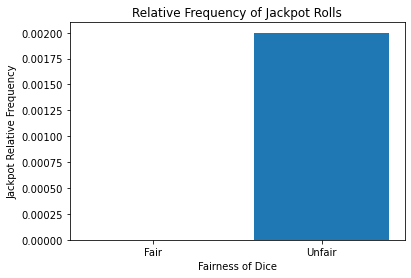

In [46]:
diegames = ['Fair', 'Unfair']
rf = [fair_rf, unfair_rf]

plt.bar(diegames, rf)
plt.title('Relative Frequency of Jackpot Rolls')
plt.xlabel('Fairness of Dice')
plt.ylabel('Jackpot Relative Frequency')
plt.show()

In [56]:
fair_combos = a_fair.combo()

       0  1  2  3  4  count
Index                      
0      1  1  1  1  2      1
1      4  6  4  3  4      1
2      4  6  4  4  2      1
3      4  6  4  6  3      1
4      4  6  5  1  2      1
...   .. .. .. .. ..    ...
936    5  2  2  6  3      2
937    1  2  1  6  4      2
938    4  4  3  3  1      2
939    1  4  4  1  3      2
940    4  2  2  4  6      3

[941 rows x 6 columns]


In [55]:
unfair_combos = a_unfair.combo()

       0  1  2  3  4  count
Index                      
0      1  1  1  1  5      1
1      6  1  2  3  3      1
2      6  1  2  5  4      1
3      6  1  3  1  3      1
4      6  1  3  3  2      1
...   .. .. .. .. ..    ...
799    6  6  1  3  5      5
800    6  6  1  6  1      5
801    6  6  1  5  2      5
802    6  6  1  3  4      6
803    6  6  1  6  3      7

[804 rows x 6 columns]


## Scenario 3: Letters of the Roman Alphabet 
Create a "die" of letters from a to z with weights based on their frequency of usage. See Appendix for these weights.
Play a game involving 5 of these dice with 1000 rolls.
How many combos can you that look like actual English words?
NOTE: "combo" here should really be permutation, which make sense for words. So just compute these from the result data you get from the Game object.
Based on your eye count, what is the relative frequency of these words versus the rest?
NOTE: You can do a few random sample to compute your estimate.
The weights for the letters are in the Appendix to this document.

In [57]:
alpha = Die(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 
             'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y','z'])

In [58]:
alpha.change_weight('a', 8.4966)

In [59]:
alpha.change_weight('b', 2.0720)
alpha.change_weight('c', 4.5388)
alpha.change_weight('d', 3.3844)
alpha.change_weight('e', 11.1607)
alpha.change_weight('f', 1.8121)
alpha.change_weight('g', 2.4705)

In [60]:
alpha.change_weight('h', 3.0034)
alpha.change_weight('i', 7.5448)
alpha.change_weight('j', 0.1965)
alpha.change_weight('k', 1.1016)
alpha.change_weight('l', 5.4893)
alpha.change_weight('m', 3.0129)
alpha.change_weight('n', 6.6544)
alpha.change_weight('o', 7.1635)
alpha.change_weight('p', 3.1671)
alpha.change_weight('q', 0.1962)
alpha.change_weight('r', 7.5809)
alpha.change_weight('s', 5.7351)
alpha.change_weight('t', 6.9509)
alpha.change_weight('u', 3.3608)
alpha.change_weight('v', 1.0074)
alpha.change_weight('w', 1.2899)
alpha.change_weight('x', 0.2902)
alpha.change_weight('y', 1.7779)
alpha.change_weight('z', 0.2722)

In [61]:
alpha.df

,Weights,Faces
0,8.4966,a
1,2.0720,b
2,4.5388,c
3,3.3844,d
4,11.1607,e
5,1.8121,f
6,2.4705,g
7,3.0034,h
8,7.5448,i
9,0.1965,j


In [63]:
word_game = Game([alpha, alpha, alpha, alpha, alpha])

[<montecarlo.Die object at 0x7f660e169970>, <montecarlo.Die object at 0x7f660e169970>, <montecarlo.Die object at 0x7f660e169970>, <montecarlo.Die object at 0x7f660e169970>, <montecarlo.Die object at 0x7f660e169970>]


In [64]:
word_game.play(1000)

In [79]:
df_wg = word_game.show()

In [82]:
df_wg.sample(n=5)

,0,1,2,3,4
Roll Number,,,,,
153,y,m,i,t,x
232,v,u,h,o,w
681,c,n,r,i,e
377,u,i,i,d,e
690,e,i,o,t,y


In [138]:
df_wg.sample(n=20)

,0,1,2,3,4
Roll Number,,,,,
873,e,p,s,d,o
433,a,u,o,g,c
620,a,i,t,h,r
902,s,l,h,d,e
386,i,m,i,t,p
204,l,e,p,a,r
313,a,l,r,t,a
327,u,i,o,h,n
284,r,s,h,i,v


^ ran this an obscene number of times; my final estimate is *0.00012*